In [83]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import cv2
import random
import cv2 as cv
from matplotlib import pyplot as plt
from image_utils import draw_lines, draw_lines_polar

In [7]:
img = cv2.imread('football.png')
print(img.size)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

167256


In [220]:
#Aplicamos filtro gaussiano para eliminar ruido
filter_size = 5 #El filtro tiene que ser numero impar
img_gauss = cv2.GaussianBlur(img,(filter_size,filter_size), sigmaX=1)
#cv2.imshow('image', img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

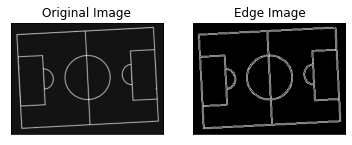

In [221]:
##https://docs.opencv.org/3.4/da/d22/tutorial_py_canny.html
img = cv.imread('football.png',0)
edges = cv.Canny(img,100,200)

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [222]:
edges

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

(202, 276)


55752

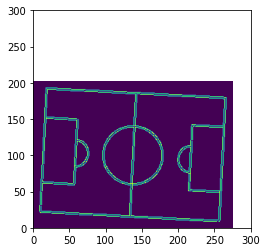

In [223]:
print(edges.shape)
plt.imshow(edges)
plt.axis([0, 300, 0, 300])
202*276

In [231]:
coordenadas_bordes = []

for x in range(len(edges)):
    for y in range(len(edges[x])):
        
        if(edges[x][y] > 0): coordenadas_bordes.append((y,x))

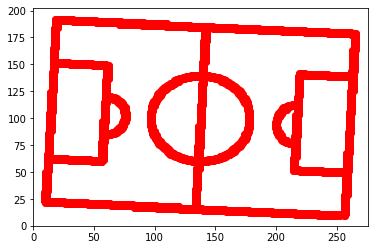

In [232]:
x = []
y = []

ancho = 202
largo = 276
for coordenada  in coordenadas_bordes:
    x.append(coordenada[0])
    y.append(coordenada[1])

plt.plot(x,y, 'ro')
plt.axis([0, largo, 0, ancho])
plt.show()

In [233]:

def calcular_recta(a,b):
    
    m = (b[1]-a[1])/(b[0]-a[0])
    b = a[1] - m*a[0]
    return(m,b)
    
def calcular_inliner(recta, punto, tolerancia):

    m = recta[0]
    b = recta[1]
    y = m*punto[0] + b

    if(abs(y - punto[1]) < tolerancia): return True
    else: return False
    #valor = punto[1] - m*punto[0]
    #if(abs(valor - b) < tolerancia): return True
    
def total_inliners(recta, tolerancia, coordenadas_bordes):
    inliners = 0
    for punto in coordenadas_bordes:
        if(calcular_inliner(recta, punto, tolerancia)): inliners+= 1
    return inliners

In [202]:
recta = calcular_recta([1,2],[3,4])
print(f'y = {recta[0]}x + {recta[1]}')
'''
print(f'{recta[0]}x + {recta[1]}y + {recta[2]} = 0')
print(f'{recta[0]}x + {recta[1]}y = {-recta[2]}')
'''

y = 1.0x + 1.0


"\nprint(f'{recta[0]}x + {recta[1]}y + {recta[2]} = 0')\nprint(f'{recta[0]}x + {recta[1]}y = {-recta[2]}')\n"

In [203]:

a = coordenadas_bordes[random.randint(0, len(coordenadas_bordes) - 1)]
b = coordenadas_bordes[random.randint(0, len(coordenadas_bordes) - 1)]
recta = calcular_recta(a,b)
inliners = total_inliners(recta, 10, coordenadas_bordes)
print(a,b)
#print(f"Recta: {recta[0]}x + {recta[1]}y = {-recta[2]}")
print(f'y = {recta[0]}x + {recta[1]}')
print("Inliners: ", inliners)

(14, 70) (143, 177)
y = 0.8294573643410853x + 58.3875968992248
Inliners:  203


In [228]:

def ransac(edges_points, iterations, inliners_needed, tolerancia):

    rectas = []

    for x in range(0, iterations):

        a = edges_points[random.randint(0, len(edges_points) -1)]
        b = edges_points[random.randint(0, len(edges_points) -1)]
        
        #print(a,b)
        if(a[0] != b[0]):
            r = calcular_recta(a,b)
            inliners = total_inliners(r, tolerancia, edges_points)

            if(inliners >= inliners_needed): rectas.append(r)
    
    return rectas

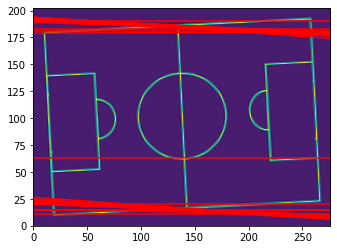

In [230]:
result = ransac(coordenadas_bordes, 1000, 30, 0.15)

#for r in x:
#    print(f'y = {recta[0]}x + {recta[1]}')

draw_lines(img,result)